In [5]:
import pandas as pd
import requests
import json
import re
from bs4 import BeautifulSoup
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.rcParams['pdf.fonttype'] = 42
import subprocess
from pywaffle import Waffle

%matplotlib inline

In [7]:
# Story: The social and racial makeup of NYC high school students to see if there are relationships between these 
# factors and academic achievement.

In [8]:
df = pd.read_csv("demographics.csv")

In [14]:
df = df[df.district != 84]

In [15]:
df['%_chronically_absent'] = df['%_chronically_absent'].astype(float)

## High School Students, Race and Temporary Housing

### Temporary Housing

In [16]:
plt.rcParams["figure.figsize"] = (20, 3)

In [17]:
temp_housing = df.pivot_table(columns='district', index='year', values='%_temp_housing')

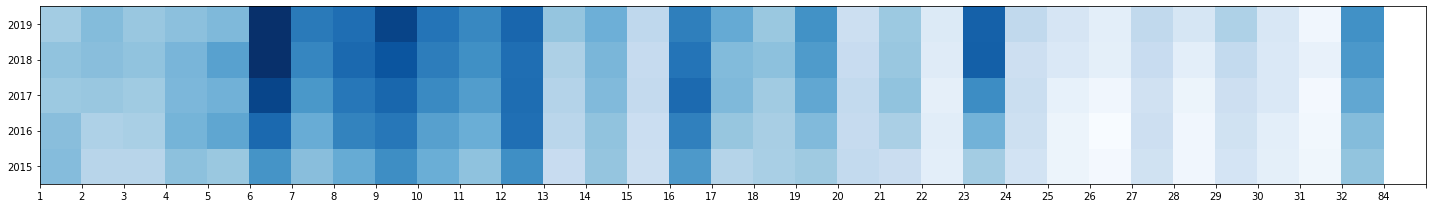

In [18]:
plt.pcolor(temp_housing, cmap='Blues')
tick_labels = temp_housing.index
tick_locations = np.arange(0.5, len(tick_labels), 1)
tick_labels = ['2015', '2016', '2017', '2018', '2019']
tick_locations = [0.5, 1.5,2.5,3.5, 4.5]
tick_x_labels= ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24', '25', '26', '27', '28', '29','30','31','32','84']
tick_x = np.arange(0.5, len(tick_labels), 1)
tick_x=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33]


plt.yticks(tick_locations, tick_labels)
plt.xticks(tick_x, tick_x_labels)
plt.tight_layout()
# plt.savefig('homelessheatmap.pdf')

In [19]:
df2019 = df[df.year == 2019]

In [20]:
# df2019.plot(x='%_white', y=['%_chronically_absent'], kind='scatter', figsize=(5,5))
# plt.tight_layout()

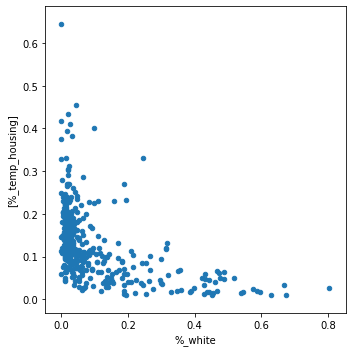

In [21]:
df2019.plot(x='%_white', y=['%_temp_housing'], kind='scatter', figsize=(5,5))
plt.tight_layout()

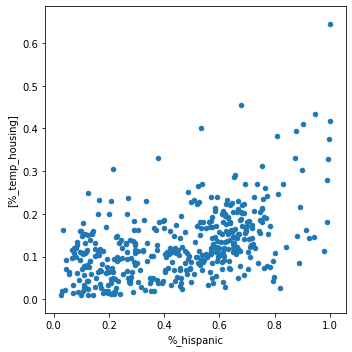

In [25]:
df2019.plot(x='%_hispanic', y=['%_temp_housing'], kind='scatter', figsize=(5,5))
plt.tight_layout()

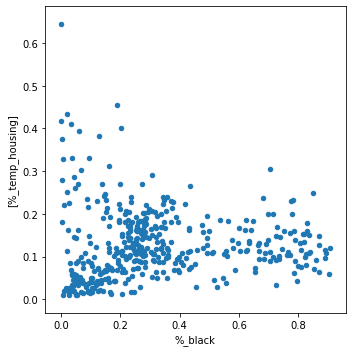

In [26]:
df2019.plot(x='%_black', y=['%_temp_housing'], kind='scatter', figsize=(5,5))
plt.tight_layout()

## SAT Analysis 2019

In [34]:
sat_2019 = pd.read_excel('scores2019.xlsx')

In [35]:
sat_2019 = sat_2019[sat_2019.district != 84]

In [36]:
sat_2019.dtypes

year                                     int64
district                                 int64
DBN                                     object
School Name                             object
average_score_SAT_math                  object
average_score_SAT_reading               object
%_students_SAT_math_college_ready       object
%_students_SAT_reading_college_ready    object
dtype: object

In [37]:
sat_2019['average_score_SAT_math'] = sat_2019['average_score_SAT_math'].astype(str)
sat_2019['average_score_SAT_reading'] = sat_2019['average_score_SAT_reading'].astype(str)
sat_2019['%_students_SAT_math_college_ready'] = sat_2019['%_students_SAT_math_college_ready'].astype(str)
sat_2019['%_students_SAT_reading_college_ready'] = sat_2019['%_students_SAT_reading_college_ready'].astype(str)

In [38]:
sat_2019['average_score_SAT_math'] = sat_2019['average_score_SAT_math'].str.replace(r'^.$','0')
sat_2019['average_score_SAT_reading'] = sat_2019['average_score_SAT_reading'].str.replace('^.$','0', regex=True)
sat_2019['%_students_SAT_math_college_ready'] = sat_2019['%_students_SAT_math_college_ready'].str.replace('^.$','0', regex=True)
sat_2019['%_students_SAT_reading_college_ready'] = sat_2019['%_students_SAT_reading_college_ready'].str.replace('^.$','0', regex=True)

In [39]:
sat_2019.head()

,year,district,DBN,School Name,average_score_SAT_math,average_score_SAT_reading,%_students_SAT_math_college_ready,%_students_SAT_reading_college_ready
0,2019,1,01M292,Orchard Collegiate Academy,448.4,438,0.107,0.179
1,2019,1,01M448,University Neighborhood High School,510.5,502.6,0.404,0.556
2,2019,1,01M450,East Side Community School,525.2,527,0.404,0.734
3,2019,1,01M509,Marta Valle High School,467.3,472,0.194,0.472
4,2019,1,01M539,"New Explorations into Science, Technology and ...",679.4,646.2,0.921,0.964


In [40]:
df2 = sat_2019.merge(df2019, left_on='School Name', right_on='school_name')

In [41]:
df2=df2.apply(pd.to_numeric, errors='ignore')

In [42]:
df2 = df2.replace(0, np.nan)

In [44]:
df2.head(2)

,year_x,district_x,DBN_x,School Name,average_score_SAT_math,average_score_SAT_reading,%_students_SAT_math_college_ready,%_students_SAT_reading_college_ready,year_y,district_y,...,%_self_contained,economic_need_index,%_temp_housing,%_HRA_eligible,%_asian,%_black,%_hispanic,%_white,student_attendance_rate,%_chronically_absent
0,2019,1,01M292,Orchard Collegiate Academy,448.4,438.0,0.107,0.179,2019,1,...,0.005,0.87,0.183,0.782,0.096,0.269,0.569,0.030,0.917,0.289
1,2019,1,01M448,University Neighborhood High School,510.5,502.6,0.404,0.556,2019,1,...,NaN,0.83,0.180,0.723,0.369,0.195,0.383,0.046,0.909,0.274


## SAT Scores and Temporary Housing

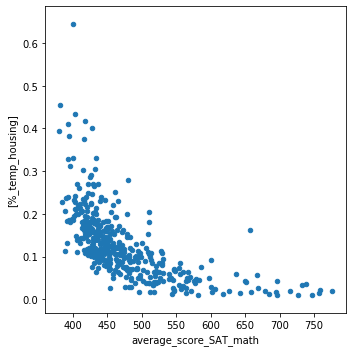

In [45]:
df2.plot(x='average_score_SAT_math', y=['%_temp_housing'], kind='scatter', figsize=(5,5))
plt.tight_layout()

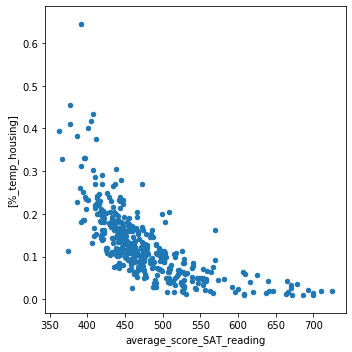

In [46]:
df2.plot(x='average_score_SAT_reading', y=['%_temp_housing'], kind='scatter', figsize=(5,5))
plt.tight_layout()

In [29]:
# df2.to_csv('schools2019.csv')

## Over 100% increase of homeless high school students in ten years

In [49]:
counties = pd.read_excel('homelessbycounty.xlsx')

In [50]:
counties.groupby(by=['year']).total_high_school.sum()

year
2010    18478
2011     6349
2012    22622
2013    24466
2014    26209
2015    27264
2016    32131
2017    35164
2018    36940
2019    36066
Name: total_high_school, dtype: int64

### New York City vs. Rest of New York State

In [51]:
ny_data = counties[(counties.COUNTY != 'BRONX') & (counties.COUNTY != 'RICHMOND') & (counties.COUNTY != 'QUEENS') & (counties.COUNTY != 'NEW YORK') & (counties.COUNTY != 'KINGS')]

In [52]:
ny_data = ny_data.reset_index()

In [53]:
ny_data = pd.DataFrame(ny_data.groupby(by=['year']).total_high_school.sum())

In [54]:
nyc_data = counties[(counties.COUNTY == 'BRONX') | (counties.COUNTY == 'RICHMOND') | (counties.COUNTY == 'QUEENS') | (counties.COUNTY == 'NEW YORK') | (counties.COUNTY == 'KINGS')]

In [55]:
nyc_data = pd.DataFrame(nyc_data.groupby(by=['year']).total_high_school.sum()).reset_index()

In [56]:
df3 = ny_data.merge(nyc_data, left_on='year', right_on='year')

In [57]:
df3 = df3[(df3.year != 2010) & (df3.year != 2011)]

In [58]:
df3

,year,total_high_school_x,total_high_school_y
2,2012,7563,15059
3,2013,8106,16360
4,2014,8031,18178
5,2015,8818,18446
6,2016,9559,22572
7,2017,10129,25035
8,2018,10573,26367
9,2019,9522,26544


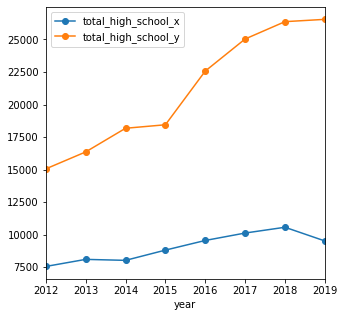

In [59]:
df3.plot(x='year',y=['total_high_school_x', 'total_high_school_y'], marker= 'o',figsize=(5,5))

In [60]:
nyc_data = counties[(counties.COUNTY == 'BRONX') | (counties.COUNTY == 'RICHMOND') | (counties.COUNTY == 'QUEENS') | (counties.COUNTY == 'NEW YORK') | (counties.COUNTY == 'KINGS')]

In [61]:
nyc_data = nyc_data[(nyc_data.year != 2010) & (nyc_data.year != 2011)]

In [62]:
nyc_counties = pd.DataFrame(nyc_data.groupby(by=['year', 'COUNTY']).total_high_school.sum()).reset_index()

## Race, Homelessness, SAT College Readiness by district

In [63]:
df2 = df2.drop(['year_y', 'district_y', 'DBN_y', 'school_name'], axis=1).rename(columns={'year_x': 'year', 'district_x': 'district', 'DBN_x': 'DBN'})

In [65]:
df2.head(2)

,year,district,DBN,School Name,average_score_SAT_math,average_score_SAT_reading,%_students_SAT_math_college_ready,%_students_SAT_reading_college_ready,enrollment,avg_grade_8_english_proficiency,...,%_self_contained,economic_need_index,%_temp_housing,%_HRA_eligible,%_asian,%_black,%_hispanic,%_white,student_attendance_rate,%_chronically_absent
0,2019,1,01M292,Orchard Collegiate Academy,448.4,438.0,0.107,0.179,197,2.70,...,0.005,0.87,0.183,0.782,0.096,0.269,0.569,0.030,0.917,0.289
1,2019,1,01M448,University Neighborhood High School,510.5,502.6,0.404,0.556,483,2.97,...,NaN,0.83,0.180,0.723,0.369,0.195,0.383,0.046,0.909,0.274


In [66]:
df2['asian_count'] = df2['enrollment'] * df2['%_asian']
df2['white_count'] = df2['enrollment'] * df2['%_white']
df2['black_count'] = df2['enrollment'] * df2['%_black']
df2['hispanic_count'] = df2['enrollment'] * df2['%_hispanic']
df2['homeless_count'] = df2['enrollment'] * df2['%_temp_housing']
df2['sat_math_college_ready_count'] = df2['enrollment'] * df2['%_students_SAT_math_college_ready']
df2['sat_reading_college_ready_count'] = df2['enrollment'] * df2['%_students_SAT_reading_college_ready']
df2['sat_score'] = df2['average_score_SAT_math'] + df2['average_score_SAT_reading']

In [67]:
df2['%_non_white'] = ((df2['black_count'] + df2['hispanic_count']) * 100) / df2['enrollment']

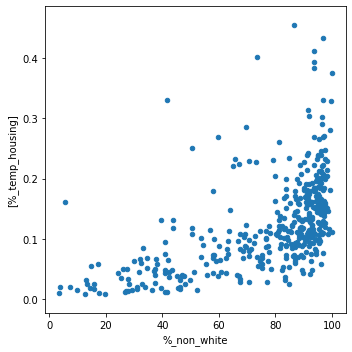

In [68]:
df2.plot(x='%_non_white', y=['%_temp_housing'], kind='scatter', figsize=(5,5))
plt.tight_layout()

In [72]:
df2.sat_score.mean()

950.7247596153846

In [73]:
df2.to_csv('scatter.csv')

In [74]:
districts = pd.pivot_table(df2, index='district', values = ['enrollment', 'homeless_count', 'sat_math_college_ready_count', 'sat_reading_college_ready_count', 'asian_count', 'white_count', 'black_count', 'hispanic_count'], aggfunc=sum).reset_index()

In [75]:
districts['pct_asian'] = (districts['asian_count'] / districts['enrollment']) * 100
districts['pct_white'] = (districts['white_count'] / districts['enrollment']) * 100
districts['pct_black'] = (districts['black_count'] / districts['enrollment']) * 100
districts['pct_hispanic'] = (districts['hispanic_count'] / districts['enrollment']) * 100
districts['pct_homeless'] = (districts['homeless_count'] / districts['enrollment']) * 100
districts['pct_college_ready_math_SAT'] = (districts['sat_math_college_ready_count'] / districts['enrollment']) * 100
districts['pct_college_ready_reading_SAT'] = (districts['sat_reading_college_ready_count'] / districts['enrollment']) * 100

In [76]:
sat_math_scores = pd.DataFrame(df2.groupby(by='district').average_score_SAT_math.mean()).reset_index()
sat_reading_scores = pd.DataFrame(df2.groupby(by='district').average_score_SAT_reading.mean()).reset_index()
sat_overall_scores = pd.DataFrame(df2.groupby(by='district').sat_score.mean()).reset_index()

In [77]:
districts = sat_math_scores.merge(districts, left_on='district', right_on='district')

In [78]:
districts = sat_reading_scores.merge(districts, left_on='district', right_on='district')

In [79]:
districts = sat_overall_scores.merge(districts, left_on='district', right_on='district')

In [80]:
top10 = districts.sort_values(by='pct_homeless', ascending=False).reset_index().head(10)

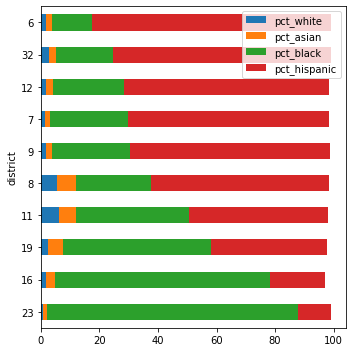

In [81]:
top10.sort_values(by='pct_hispanic').plot(x='district', y=['pct_white', 'pct_asian', 'pct_black','pct_hispanic'], kind = 'barh', stacked=True, figsize=(5,5))
plt.tight_layout()

In [82]:
districts['pct_non_white'] = ((districts['hispanic_count'] + districts['black_count']) * 100) / districts['enrollment']

In [83]:
plt.rcParams["figure.figsize"] = (5, 5)

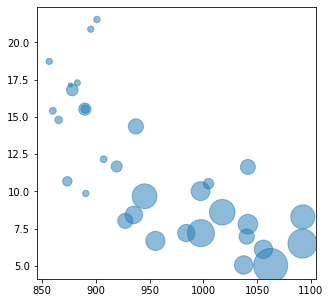

In [84]:
x=districts['sat_score']
y=districts['pct_homeless']
s=districts['pct_white']
plt.scatter(x, y, s=s*25, alpha=0.5)
plt.show()

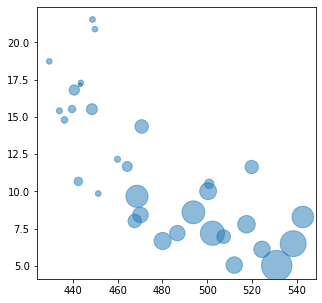

In [85]:
x=districts['average_score_SAT_reading']
y=districts['pct_homeless']
s=districts['pct_white']
plt.scatter(x, y, s*20, alpha=0.5)
plt.show()

In [86]:
districts.dtypes

district                             int64
sat_score                          float64
average_score_SAT_reading          float64
average_score_SAT_math             float64
asian_count                        float64
black_count                        float64
enrollment                           int64
hispanic_count                     float64
homeless_count                     float64
sat_math_college_ready_count       float64
sat_reading_college_ready_count    float64
white_count                        float64
pct_asian                          float64
pct_white                          float64
pct_black                          float64
pct_hispanic                       float64
pct_homeless                       float64
pct_college_ready_math_SAT         float64
pct_college_ready_reading_SAT      float64
pct_non_white                      float64
dtype: object

In [88]:
districts.head(2)

,district,sat_score,average_score_SAT_reading,average_score_SAT_math,asian_count,black_count,enrollment,hispanic_count,homeless_count,sat_math_college_ready_count,sat_reading_college_ready_count,white_count,pct_asian,pct_white,pct_black,pct_hispanic,pct_homeless,pct_college_ready_math_SAT,pct_college_ready_reading_SAT,pct_non_white
0,1,1092.583333,542.600000,549.983333,599.271,409.733,2407,775.416,199.379,1534.844,1814.290,561.676,24.897009,23.335106,17.022559,32.215039,8.283299,63.765850,75.375571,49.237599
1,2,997.470492,500.377049,497.093443,5822.301,6154.331,31788,14342.151,3182.588,12996.990,18413.963,4519.287,18.316034,14.216959,19.360548,45.118129,10.011916,40.886467,57.927403,64.478677


In [89]:
# districts.to_csv('districts.csv')

In [90]:
multiples = districts[['district', 'pct_asian', 'pct_white', 'pct_black', 'pct_hispanic']]

In [91]:
multiples['other_unidentified'] = multiples.iloc[:, 1:5].sum(axis=1)

/Users/elenamlutz/.pyenv/versions/3.7.5/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [92]:
multiples['other_unidentified'] = 100 - multiples['other_unidentified']

/Users/elenamlutz/.pyenv/versions/3.7.5/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [93]:
multiples.head(2)

,district,pct_asian,pct_white,pct_black,pct_hispanic,other_unidentified
0,1,24.897009,23.335106,17.022559,32.215039,2.530287
1,2,18.316034,14.216959,19.360548,45.118129,2.988329


In [94]:
multiples = multiples.melt(id_vars=["district"], 
        var_name="race", 
        value_name="percent").sort_values(by='district')

In [95]:
multiples.to_csv('multiples.csv')

## Homeless Students and Regents Exams

In [98]:
regents = pd.read_excel('regentsexams.xlsx')

In [100]:
regents.head(2)

,ENTITY_NAME,SUBGROUP_NAME,SUBJECT,COHORT,COHORT_COUNT,NTEST_COUNT,NTEST_%COHORT,TEST_COUNT,TEST_%COHORT,LEVEL1_COUNT,LEVEL1_%COHORT,LEVEL2_COUNT,LEVEL2_%COHORT,LEVEL3_COUNT,LEVEL3_%COHORT,LEVEL4_COUNT,LEVEL4_%COHORT,PROF_COUNT,PROF_%COHORT
0,NEW YORK CITY GEOGRAPHIC DISTRICT # 1,Homeless,Global History & Geography,2015,80,23,29,57,71,6,8,10,13,28,35,13,16,41,51
1,NEW YORK CITY GEOGRAPHIC DISTRICT # 1,Homeless,US History & Gov’t,2015,80,33,41,47,59,6,8,8,10,19,24,14,18,33,41


In [101]:
subjects = pd.DataFrame(regents.groupby(by=['SUBGROUP_NAME','SUBJECT'])['PROF_COUNT','COHORT_COUNT'].sum().sort_values(by='SUBJECT').reset_index())

In [102]:
subjects['pct_proficiency'] = subjects.apply(lambda row: (row['PROF_COUNT'] / row['COHORT_COUNT'])*100, axis=1)

In [134]:
subjects

,SUBGROUP_NAME,SUBJECT,PROF_COUNT,COHORT_COUNT,pct_prof
0,Homeless,ELA,3397,5344,63.566617
1,Homeless,Global History & Geography,2810,5344,52.582335
2,Homeless,Math,3392,5344,63.473054
3,Homeless,Science,3154,5344,59.019461
4,Homeless,US History & Gov’t,2740,5344,51.272455
5,Not Homeless,ELA,56057,68428,81.921143
6,Not Homeless,Global History & Geography,48554,68428,70.956334
7,Not Homeless,Math,53742,68428,78.538025
8,Not Homeless,Science,52670,68428,76.971415
9,Not Homeless,US History & Gov’t,48972,68428,71.567195


In [104]:
proficiency_districts = pd.DataFrame(regents.groupby(by=['ENTITY_NAME', 'SUBGROUP_NAME'])['PROF_COUNT','COHORT_COUNT'].sum().reset_index())

In [105]:
proficiency_districts['pct_proficiency'] = proficiency_districts.apply(lambda row: (row['PROF_COUNT'] / row['COHORT_COUNT'])*100, axis=1)

In [107]:
proficiency_districts.sort_values(by='pct_proficiency').head(2)

,ENTITY_NAME,SUBGROUP_NAME,PROF_COUNT,COHORT_COUNT,pct_proficiency
22,NEW YORK CITY GEOGRAPHIC DISTRICT #12,Homeless,424,1055,40.189573
44,NEW YORK CITY GEOGRAPHIC DISTRICT #23,Homeless,154,365,42.191781


In [108]:
subjects = subjects.groupby(by=['SUBGROUP_NAME', 'SUBJECT'])['PROF_COUNT', 'COHORT_COUNT'].sum().reset_index()

In [109]:
subjects['pct_prof'] = (subjects['PROF_COUNT'] * 100) / subjects['COHORT_COUNT']

In [110]:
subjects.sort_values(by='SUBJECT')

,SUBGROUP_NAME,SUBJECT,PROF_COUNT,COHORT_COUNT,pct_prof
0,Homeless,ELA,3397,5344,63.566617
5,Not Homeless,ELA,56057,68428,81.921143
1,Homeless,Global History & Geography,2810,5344,52.582335
6,Not Homeless,Global History & Geography,48554,68428,70.956334
2,Homeless,Math,3392,5344,63.473054
7,Not Homeless,Math,53742,68428,78.538025
3,Homeless,Science,3154,5344,59.019461
8,Not Homeless,Science,52670,68428,76.971415
4,Homeless,US History & Gov’t,2740,5344,51.272455
9,Not Homeless,US History & Gov’t,48972,68428,71.567195


In [111]:
proficiency_districts = proficiency_districts.pivot_table(index='ENTITY_NAME', 
                                                          columns='SUBGROUP_NAME', values='pct_proficiency').reset_index()

In [112]:
proficiency_districts['pct_diff'] = proficiency_districts.apply(lambda row: (row['Not Homeless'] - row['Homeless']), axis=1)

In [113]:
proficiency_districts.sort_values(by='Homeless', ascending=True)

SUBGROUP_NAME,ENTITY_NAME,Homeless,Not Homeless,pct_diff
11,NEW YORK CITY GEOGRAPHIC DISTRICT #12,40.189573,55.314685,15.125112
22,NEW YORK CITY GEOGRAPHIC DISTRICT #23,42.191781,48.365180,6.173400
6,NEW YORK CITY GEOGRAPHIC DISTRICT # 7,42.995595,54.170918,11.175324
15,NEW YORK CITY GEOGRAPHIC DISTRICT #16,46.785714,58.387097,11.601382
23,NEW YORK CITY GEOGRAPHIC DISTRICT #24,49.354839,77.080467,27.725628
31,NEW YORK CITY GEOGRAPHIC DISTRICT #32,49.655172,65.551724,15.896552
8,NEW YORK CITY GEOGRAPHIC DISTRICT # 9,50.699088,66.591398,15.892310
0,NEW YORK CITY GEOGRAPHIC DISTRICT # 1,50.750000,67.710583,16.960583
7,NEW YORK CITY GEOGRAPHIC DISTRICT # 8,50.917431,61.696275,10.778844
2,NEW YORK CITY GEOGRAPHIC DISTRICT # 3,52.307692,74.990926,22.683233


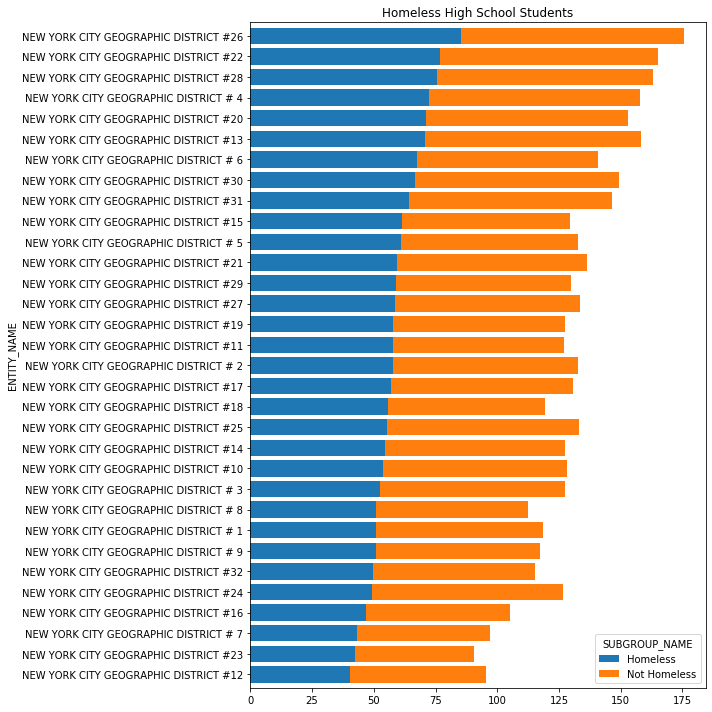

In [114]:
proficiency_districts.sort_values(by='Homeless').plot(x='ENTITY_NAME',
                                                          y=['Homeless', 'Not Homeless'],
                                                          kind='barh',
                                                          stacked=True,
                                                          figsize=(10,10),
                                                          title="Homeless High School Students",
                                                          width=0.8)
plt.tight_layout()

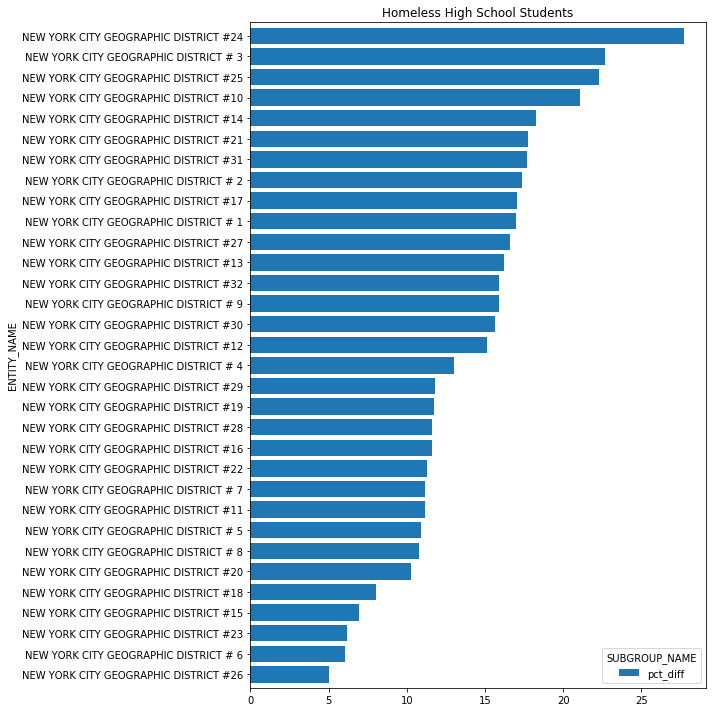

In [115]:
proficiency_districts.sort_values(by='pct_diff').plot(x='ENTITY_NAME',
                                                          y=['pct_diff'],
                                                          kind='barh',
                                                          stacked=True,
                                                          figsize=(10,10),
                                                          title="Homeless High School Students",
                                                          width=0.8)
plt.tight_layout()

In [116]:
waffle = districts[(districts.district == 6) | (districts.district == 9) | (districts.district == 12) | (districts.district == 7) | (districts.district == 23)]

In [117]:
waffle.head()

,district,sat_score,average_score_SAT_reading,average_score_SAT_math,asian_count,black_count,enrollment,hispanic_count,homeless_count,sat_math_college_ready_count,sat_reading_college_ready_count,white_count,pct_asian,pct_white,pct_black,pct_hispanic,pct_homeless,pct_college_ready_math_SAT,pct_college_ready_reading_SAT,pct_non_white
5,6,901.050000,448.830000,452.220000,111.382,718.973,5327,4360.282,1147.090,1001.215,1772.339,89.870,2.090895,1.687066,13.496771,81.852487,21.533509,18.795100,33.270865,95.349258
6,7,882.885714,443.678571,439.207143,93.981,1612.146,6021,4134.204,1040.763,716.163,1554.872,90.644,1.560887,1.505464,26.775386,68.663079,17.285551,11.894420,25.824149,95.438465
8,9,895.386364,449.931818,445.454545,169.025,2130.905,7975,5462.407,1665.467,1178.807,2334.619,126.107,2.119436,1.581279,26.719812,68.494132,20.883599,14.781279,29.274219,95.213944
11,12,856.761538,429.576923,427.184615,121.996,1222.808,5043,3544.390,944.218,398.122,973.311,80.390,2.419116,1.594091,24.247630,70.283363,18.723339,7.894547,19.300238,94.530993
22,23,876.400000,443.375000,433.025000,14.085,802.975,940,105.930,161.150,98.143,265.005,6.947,1.498404,0.739043,85.422872,11.269149,17.143617,10.440745,28.192021,96.692021


In [118]:
waffle.hispanic_count.sum() * 100 / waffle.enrollment.sum()

69.57722674464554

In [120]:
waffle = pd.read_csv("top10.csv")

In [121]:
waffle.head()

,race,percent
0,pct_asian,2
1,pct_white,2
2,pct_black,26
3,pct_hispanic,70


In [122]:
waffle = waffle.sort_values(by='percent', ascending=False)

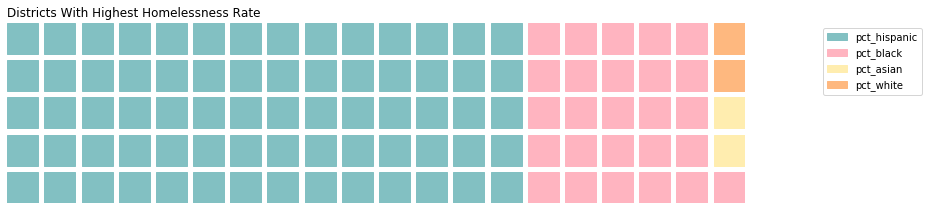

In [123]:
matplotlib.rcParams['pdf.fonttype'] = 42 #makes text editable in illustrator
%matplotlib inline
fig = plt.figure(
    FigureClass=Waffle, 
    rows=5,
    colors=("#82C0C2", "#FFB4C0", "#FFEDAF", "#FEB87F"),
    title={'label': "Districts With Highest Homelessness Rate", "loc": "left"},
    values=waffle.percent,
    labels=list(waffle.race),
    figsize=(13, 10),
#     icons='circle',
    font_size=32,
    legend={'loc': 'upper left', 'bbox_to_anchor': (1.1, 1)}
)
plt.tight_layout()
plt.savefig("top5.pdf")


In [124]:
waffle2 = districts[(districts.district == 31) | (districts.district == 26) | (districts.district == 28) | (districts.district == 22) | (districts.district == 13)]

In [125]:
waffle2.white_count.sum() * 100 / waffle2.enrollment.sum()

25.401773596088308

In [127]:
waffle2 = pd.read_excel("low10.xlsx")

In [128]:
waffle2 = waffle2.sort_values(by='percent', ascending=False)

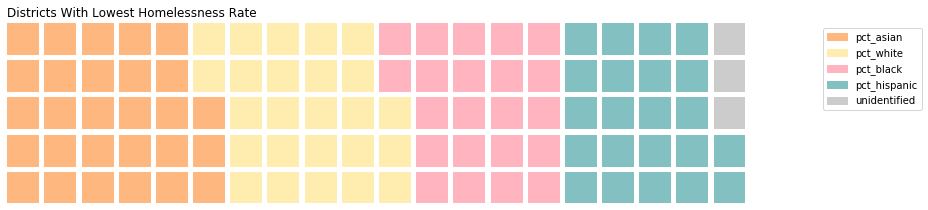

In [129]:
matplotlib.rcParams['pdf.fonttype'] = 42 #makes text editable in illustrator
%matplotlib inline
fig = plt.figure(
    FigureClass=Waffle, 
    rows=5,
    colors=("#FEB87F", "#FFEDAF", "#FFB4C0", "#82C0C2", '#cccccc'),
    title={'label': "Districts With Lowest Homelessness Rate", "loc": "left"},
    values=waffle2.percent,
    labels=list(waffle2.race),
    figsize=(13, 10),
    font_size=32,
    legend={'loc': 'upper left', 'bbox_to_anchor': (1.1, 1)}
)
plt.tight_layout()
plt.savefig("low5.pdf")
